In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [15]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2020-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data20 = pd.concat(pieces, ignore_index=False)

taxi_data20.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,passenger_count,trip_distance
Month,,
1,432598.0,1611699.55
2,416441.0,1957195.76
3,230152.0,1583166.10
4,27436.0,334410.77
5,36938.0,2167916.17


In [16]:
pieces = []

for i in range(1, 13):
    path = './files/green_tripdata_2019-{}.csv'.format((str(i)).zfill(2))
    df = pd.read_csv(path)
    df['Month'] = i
    df = df.loc[:, ['passenger_count', 'trip_distance', 'Month']]
    df = df.groupby('Month').sum()
    
    pieces.append(df)
    taxi_data19 = pd.concat(pieces, ignore_index=False)

taxi_data19.head()

C:\Users\ChangHo Kim\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,passenger_count,trip_distance
Month,,
1,831685.0,2169650.07
2,752145.0,2018287.43
3,781886.0,2076818.64
4,675613.0,1542114.00
5,659808.0,1503938.94


In [17]:
taxi_total = pd.concat([taxi_data19, taxi_data20], keys=['2019yr', '2020yr'])
taxi_total

passenger_count  trip_distance
       Month                                
2019yr 1             831685.0     2169650.07
       2             752145.0     2018287.43
       3             781886.0     2076818.64
       4             675613.0     1542114.00
       5             659808.0     1503938.94
       6             620846.0     1402742.90
       7             566946.0     1563070.18
       8             520140.0     1566423.54
       9             511536.0     1580697.81
       10            506322.0     1688128.25
       11            476779.0     1300109.95
       12            472041.0     1552421.19
2020yr 1             432598.0     1611699.55
       2             416441.0     1957195.76
       3             230152.0     1583166.10
       4              27436.0      334410.77
       5              36938.0     2167916.17
       6              47702.0     2893105.98
       7              53381.0     5635425.36
       8              59516.0     4410949.82
       9              62946.0     1137951.42
       10             68920.0     2575677.91
       11             62505.0     3556166.15
       12             58752.0     2121961.00

In [18]:
taxi_total['year'] = [2019]*12 + [2020]*12
table = pd.pivot_table(taxi_total, values=['passenger_count', 'trip_distance'], columns=['year'],
                        aggfunc={'passenger_count':np.mean, 'trip_distance':np.sum})
table

year,2019,2020
passenger_count,6.146456e+05,1.297739e+05
trip_distance,1.996440e+07,2.998563e+07


In [19]:
taxi_total.loc[:,['trip_distance']]

trip_distance
       Month               
2019yr 1         2169650.07
       2         2018287.43
       3         2076818.64
       4         1542114.00
       5         1503938.94
       6         1402742.90
       7         1563070.18
       8         1566423.54
       9         1580697.81
       10        1688128.25
       11        1300109.95
       12        1552421.19
2020yr 1         1611699.55
       2         1957195.76
       3         1583166.10
       4          334410.77
       5         2167916.17
       6         2893105.98
       7         5635425.36
       8         4410949.82
       9         1137951.42
       10        2575677.91
       11        3556166.15
       12        2121961.00

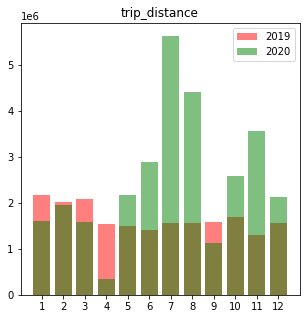

In [20]:
f, ax = plt.subplots(figsize = (5, 5))

x1 = list(range(1, 13, 1))
y1 = taxi_total['trip_distance']['2019yr']
y2 = taxi_total['trip_distance']['2020yr']
plt.bar(x1, y1, color = 'red', label='2019', alpha=0.5)
plt.bar(x1,  y2, color = 'green', label='2020', alpha=0.5)
ax.set_title('trip_distance')

ax.set_xticks(x1)
plt.legend()

plt.show()

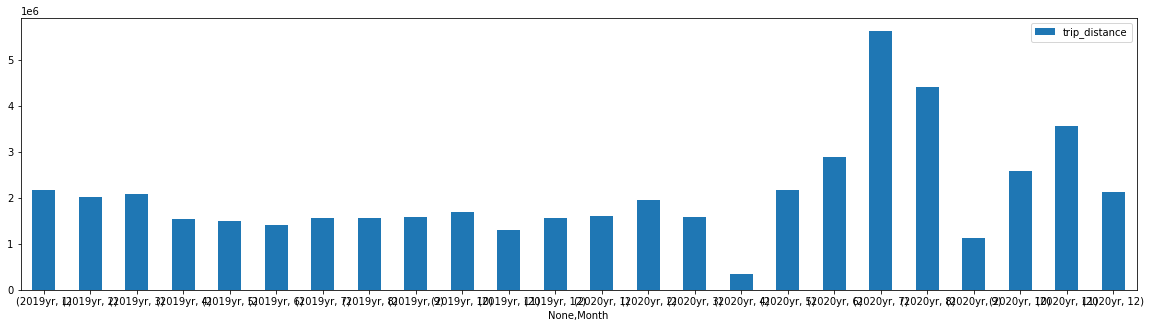

In [21]:
taxi_total.loc[:,['trip_distance']].plot(kind='bar',figsize=(20,5), rot=0)
plt.show()

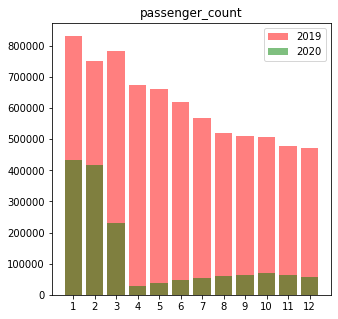

In [22]:
f, ax = plt.subplots(figsize = (5, 5))

x1 = list(range(1, 13, 1))
y1 = taxi_total['passenger_count']['2019yr']
y2 = taxi_total['passenger_count']['2020yr']
plt.bar(x1, y1, color = 'red', label='2019', alpha=0.5)
plt.bar(x1,  y2, color = 'green', label='2020', alpha=0.5)
ax.set_title('passenger_count')

ax.set_xticks(x1)
plt.legend()

plt.show()